In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/a.zip" -d '/content'

Streaming output truncated to the last 5000 lines.
  inflating: /content/Validation/male/067031.jpg.jpg  
  inflating: /content/Validation/male/067038.jpg.jpg  
  inflating: /content/Validation/male/067040.jpg.jpg  
  inflating: /content/Validation/male/067046.jpg.jpg  
  inflating: /content/Validation/male/067048.jpg.jpg  
  inflating: /content/Validation/male/067054.jpg.jpg  
  inflating: /content/Validation/male/067064.jpg.jpg  
  inflating: /content/Validation/male/067068.jpg.jpg  
  inflating: /content/Validation/male/067069.jpg.jpg  
  inflating: /content/Validation/male/067086.jpg.jpg  
  inflating: /content/Validation/male/067091.jpg.jpg  
  inflating: /content/Validation/male/067099.jpg.jpg  
  inflating: /content/Validation/male/067101.jpg.jpg  
  inflating: /content/Validation/male/067102.jpg.jpg  
  inflating: /content/Validation/male/067112.jpg.jpg  
  inflating: /content/Validation/male/067117.jpg.jpg  
  inflating: /content/Validation/male/067119.jpg.jpg  
  inflating: /

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [ ]:
name_list = glob.glob('/content/Training/*/*')
X = []
labels = []
for name in name_list:
    label = name.split('/')[-2]
    if label == 'female':
        labels.append(0)
    else:
        labels.append(1)


for name in name_list:
    X.append(name)

In [ ]:
df = pd.DataFrame()
df['image'], df['gender'] = X, labels
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,image,gender
0,/content/Training/female/150692.jpg.jpg,0
1,/content/Training/female/192490.jpg.jpg,0
2,/content/Training/female/145656.jpg.jpg,0
3,/content/Training/female/148610.jpg.jpg,0
4,/content/Training/male/148879.jpg.jpg,1


In [ ]:
from PIL import Image
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image, color_mode = "grayscale")
        img = img.resize((64, 64), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    
    features = features.reshape(len(features), 64, 64, 1)
    return features

In [ ]:
X = extract_features(df['image'])

In [ ]:
X = X/255.0

In [ ]:
y = np.array(df['gender'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from tensorflow.keras.optimizers import Adam
inp = Input(shape = (64, 64, 1))
cnn = Conv2D(filters=128, kernel_size=3, activation='relu')(inp)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters=32, kernel_size=3, activation='relu')(drop)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters=64, kernel_size=3, activation='relu')(drop)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)
drop = Dropout(0.2)(pooling)

f = Flatten()(drop)
fc1 = Dense(units=64, activation='relu')(f)
drop = Dropout(0.5)(fc1)
fc1 = Dense(units=256, activation='relu')(drop)
drop = Dropout(0.5)(fc1)
out = Dense(units=1, activation='sigmoid')(drop)
optimizer = Adam(learning_rate = 0.0001)
model = Model(inputs = inp, outputs = out)
model.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                      

In [ ]:
history = model.fit(X_train, y_train, steps_per_epoch=2000, epochs= 50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6029 - accuracy: 0.6492 - val_loss: 0.4362 - val_accuracy: 0.8007
Epoch 2/50
2000/2000 [==============================] - 11s 5ms/step - loss: 0.3580 - accuracy: 0.8540 - val_loss: 0.3007 - val_accuracy: 0.8738
Epoch 3/50
2000/2000 [==============================] - 12s 6ms/step - loss: 0.2868 - accuracy: 0.8875 - val_loss: 0.2345 - val_accuracy: 0.9077
Epoch 4/50
2000/2000 [==============================] - 12s 6ms/step - loss: 0.2521 - accuracy: 0.9015 - val_loss: 0.2114 - val_accuracy: 0.9200
Epoch 5/50
2000/2000 [==============================] - 11s 6ms/step - loss: 0.2259 - accuracy: 0.9140 - val_loss: 0.1877 - val_accuracy: 0.9298
Epoch 6/50
2000/2000 [==============================] - 12s 6ms/step - loss: 0.2111 - accuracy: 0.9209 - val_loss: 0.1793 - val_accuracy: 0.9335
Epoch 7/50
2000/2000 [==============================] - 12s 6ms/step - loss: 0.1927 - accuracy: 0.9287 - val_loss: 0.1656 - val_ac

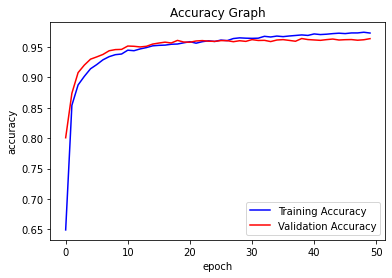

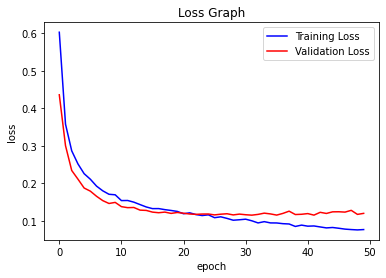

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()

In [ ]:
model.save('gender.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('gender.h5')

In [ ]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def prediction(x):
    if x >= 0.5:
        print('Male')
    else:
        print('Female')

(115, 88)
[[0.98288774]]
Male


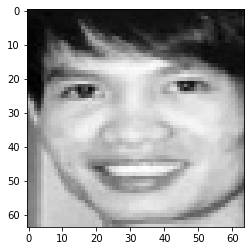

In [ ]:
img = cv2.imread('/content/11.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

new_img = cv2.resize(img, (64, 64))
plt.imshow(new_img, cmap='gray')
a = np.array([new_img/255.])
pred = model.predict(a)

print(pred)
prediction(pred)

[[0.9962549]]
Male


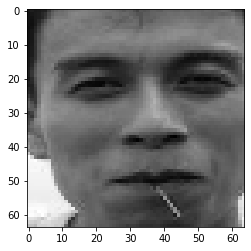

In [ ]:
img = cv2.imread('/content/4.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

new_img = cv2.resize(img, (64, 64))
plt.imshow(new_img, cmap='gray')
a = np.array([new_img/255.])
pred = model.predict(a)

print(pred)
prediction(pred)

[[0.02724845]]
Female


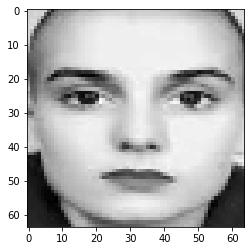

In [ ]:
img = cv2.imread('/content/nn.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

new_img = cv2.resize(img, (64, 64))
plt.imshow(new_img, cmap='gray')
a = np.array([new_img/255.])
pred = model.predict(a)

print(pred)
prediction(pred)

[[0.74756813]]
Male


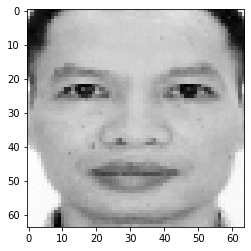

In [ ]:
img = cv2.imread('/content/5.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

new_img = cv2.resize(img, (64, 64))
plt.imshow(new_img, cmap='gray')
a = np.array([new_img/255.])
pred = model.predict(a)

print(pred)
prediction(pred)

[[0.99999714]]
Male


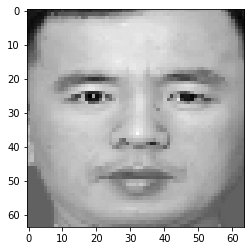

In [ ]:
img = cv2.imread('/content/15.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

new_img = cv2.resize(img, (64, 64))
plt.imshow(new_img, cmap='gray')
a = np.array([new_img/255.])
pred = model.predict(a)

print(pred)
prediction(pred)

[[0.02677378]]
Female


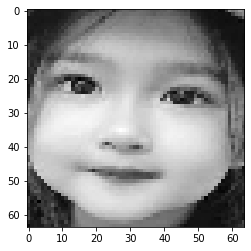

In [ ]:
img = cv2.imread('/content/i.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

new_img = cv2.resize(img, (64, 64))
plt.imshow(new_img, cmap='gray')
a = np.array([new_img/255.])
pred = model.predict(a)

print(pred)
prediction(pred)

[[0.00234238]]
Female


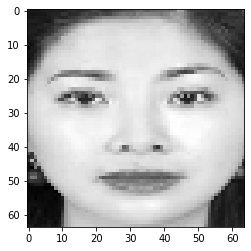

In [ ]:
img = cv2.imread('/content/10.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

new_img = cv2.resize(img, (64, 64))
plt.imshow(new_img, cmap='gray')
a = np.array([new_img/255.])
pred = model.predict(a)

print(pred)
prediction(pred)

[[0.98125964]]
Male


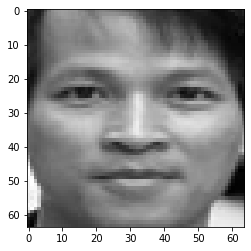

In [ ]:
img = cv2.imread('/content/6.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

new_img = cv2.resize(img, (64, 64))
plt.imshow(new_img, cmap='gray')
a = np.array([new_img/255.])
pred = model.predict(a)

print(pred)
prediction(pred)

[[0.99692816]]
Male


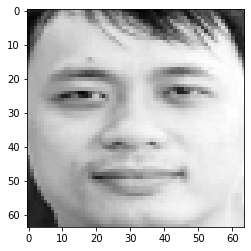

In [ ]:
img = cv2.imread('/content/2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

new_img = cv2.resize(img, (64, 64))
plt.imshow(new_img, cmap='gray')
a = np.array([new_img/255.])
pred = model.predict(a)

print(pred)
prediction(pred)

[[0.99843425]]
Male


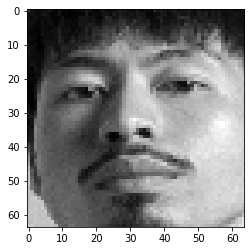

In [ ]:
img = cv2.imread('/content/j.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

new_img = cv2.resize(img, (64, 64))
plt.imshow(new_img, cmap='gray')
a = np.array([new_img/255.])
pred = model.predict(a)

print(pred)
prediction(pred)